**Importing Libraries and Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("swiggy.csv")

**Exploring Data**

In [7]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [9]:
df.shape

(8680, 10)

This dataset has 8680 rows and 10 columns.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             8680 non-null   int64  
 1   Area           8680 non-null   object 
 2   City           8680 non-null   object 
 3   Restaurant     8680 non-null   object 
 4   Price          8680 non-null   float64
 5   Avg ratings    8680 non-null   float64
 6   Total ratings  8680 non-null   int64  
 7   Food type      8680 non-null   object 
 8   Address        8680 non-null   object 
 9   Delivery time  8680 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 678.3+ KB


In [17]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

Based on the results of info() and isnull(), there are no missing values in the dataset.

In [21]:
df['ID'].nunique()

8680

ID column has no duplicate values. Total rows = 8680 | Unique IDs = 8680

In [23]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


Inference:
- Average ratings is 3.66
- Average delivery time is 54 minutes
- Minimum price is 0 (no orders)
- Maximum price is 2500

In [37]:
df.columns

Index(['ID', 'Area', 'City', 'Restaurant', 'Price', 'Avg ratings',
       'Total ratings', 'Food type', 'Address', 'Delivery time'],
      dtype='object')

In [41]:
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

Converting the 'Area' and 'City' columns to the categorical data type to improve the efficiency of operations such as grouping and filtering.

In [5]:
df['Area']=df['Area'].astype('category')
df['City']=df['City'].astype('category')

In [47]:
df.dtypes

ID                  int64
Area             category
City             category
Restaurant         object
Price             float64
Avg ratings       float64
Total ratings       int64
Food type          object
Address            object
Delivery time       int64
dtype: object

In [7]:
for i in df.columns:
    print(f"{i}:{df[i].nunique()}")

ID:8680
Area:833
City:9
Restaurant:7865
Price:120
Avg ratings:30
Total ratings:8
Food type:3734
Address:2339
Delivery time:81


Displaying the count of distinct entries within the dataset

In [9]:
#Unnesting the food type
df1 = df['Food type'].apply (lambda x: x.split(",")).tolist()
df2= pd.DataFrame(df1, index=df['ID'])
df2 = df2.stack()
newdf1 = pd.DataFrame(df2,columns=['Food type']).reset_index()
newdf = newdf1.loc[:,['ID','Food type']]
newdf

,ID,Food type
0,211,Biryani
1,211,Chinese
2,211,North Indian
3,211,South Indian
4,221,Mughlai
...,...,...
23618,465990,Indian
23619,465990,Snacks
23620,466488,Chaat
23621,466488,Snacks


**Data Analysis**

In [11]:
#City and Restaurant Volume

city_counts = df.groupby('City',observed=False)['Restaurant'].count().sort_values(ascending=False)
city_counts

City
Kolkata      1346
Mumbai       1277
Chennai      1106
Pune         1090
Hyderabad    1075
Bangalore     946
Ahmedabad     717
Delhi         611
Surat         512
Name: Restaurant, dtype: int64

In [13]:
#Revenue Breakdown by City

city_wise_price = df.groupby('City',observed=False)['Price'].sum().sort_values(ascending=False)
city_wise_price = city_wise_price.astype(int)
city_wise_price

City
Mumbai       502876
Kolkata      487648
Chennai      394010
Pune         385602
Bangalore    361868
Hyderabad    322421
Ahmedabad    228098
Delhi        203647
Surat        138328
Name: Price, dtype: int64

In [13]:
#Average Rating across Cities

avg_rating_city = round(df.groupby('City',observed=False)['Avg ratings'].mean().sort_values(ascending=False),1)
avg_rating_city

City
Chennai      3.8
Bangalore    3.8
Hyderabad    3.7
Kolkata      3.7
Mumbai       3.6
Ahmedabad    3.6
Surat        3.6
Pune         3.6
Delhi        3.5
Name: Avg ratings, dtype: float64

In [21]:
#Top and Bottom Areas by Restaurant Counts
#Top 10 Areas
highest_restaurants = df.groupby('Area',observed=False)['Restaurant'].count().sort_values(ascending=False)
highest_restaurants.head(10)

Area
Rohini          257
Chembur         208
Kothrud         149
Andheri East    135
Navrangpura     132
Indiranagar     130
Kurla           129
Koramangala     124
Bidhannagar     123
Ashok Nagar     118
Name: Restaurant, dtype: int64

In [23]:
#Bottom 10 Areas
lowest_restaurants = df.groupby('Area',observed=False)['Restaurant'].count().sort_values(ascending=True)
lowest_restaurants.head(10)

Area
 Begumpet                          1
Knk- Nungambakam (Cds)- Chennai    1
Kiran Nagar                        1
King Koti                          1
Khilwat                            1
Krishna Park Tilak Nagar           1
Krishna Nagar Colony               1
Krishan Vihar                      1
Kothapet & Dilshuknagar            1
Koramangala - Bangalore            1
Name: Restaurant, dtype: int64

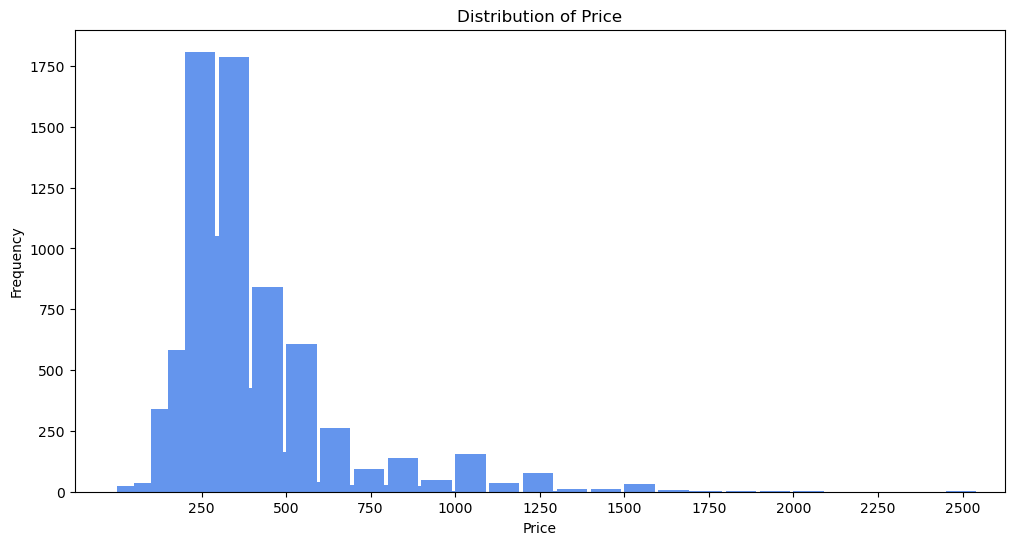

In [262]:
#Distribution of Price 
plt.figure(figsize=(12,6))
plt.hist(df['Price'],bins=50,width=90,color="cornflowerblue")
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xticks([250,500,750,1000,1250,1500,1750,2000,2250,2500])
plt.title("Distribution of Price")
plt.show()

Inference:
- Price data is right skewed (positive skewed).
- Most of the price values are clustered between ₹150 – ₹500.
- A few values stretch up to ₹2500.

In [28]:
#Average Customer Ratings

ratings_count = df.groupby('Avg ratings')['Avg ratings'].count().sort_values(ascending=False)
avg_ratings_df = ratings_count.reset_index(name='count')
avg_ratings_df.columns = ['ratings', 'count']
avg_ratings_df

,ratings,count
0,2.9,3279
1,4.3,792
2,4.2,754
3,4.1,700
4,4.4,573
5,4.0,524
6,3.9,421
7,4.5,338
8,3.8,313
9,3.7,207


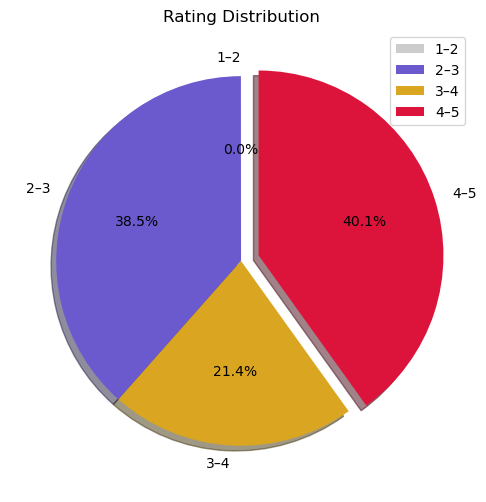

In [254]:
bins = [1,2,3,4,5]
labels = ['1–2','2–3','3–4','4–5']
new_colors = ['#CCCCCC', '#6A5ACD', '#DAA520', '#DC143C']
df['rating_bin'] = pd.cut(df['Avg ratings'], bins=bins, labels=labels, include_lowest=True)
plt.figure(figsize=(5,8))
bin_counts = df['rating_bin'].value_counts().sort_index()
plt.pie(bin_counts, labels=bin_counts.index, colors=new_colors,autopct='%1.1f%%', explode=[0, 0, 0, 0.1],startangle=90,shadow=True)
plt.title("Rating Distribution")
plt.legend()
plt.tight_layout()
plt.show()

Inference:
- The single largest group is 2.9 rating, with 3279 occurrences.
- This indicates that a significant portion of the products/services receive below-average user satisfaction.
- Around 34.5% fall in mid-to-high rating ranges(3-4,4-5).
- A sizeable portion of users are satisfied or very satisfied.
- Distribution is polarized. A large chunk is clustered near 2.9,and another smaller but significant chunk sits between 4.0–4.4.
- Implies some items doing exceptionally well while others performing poorly.

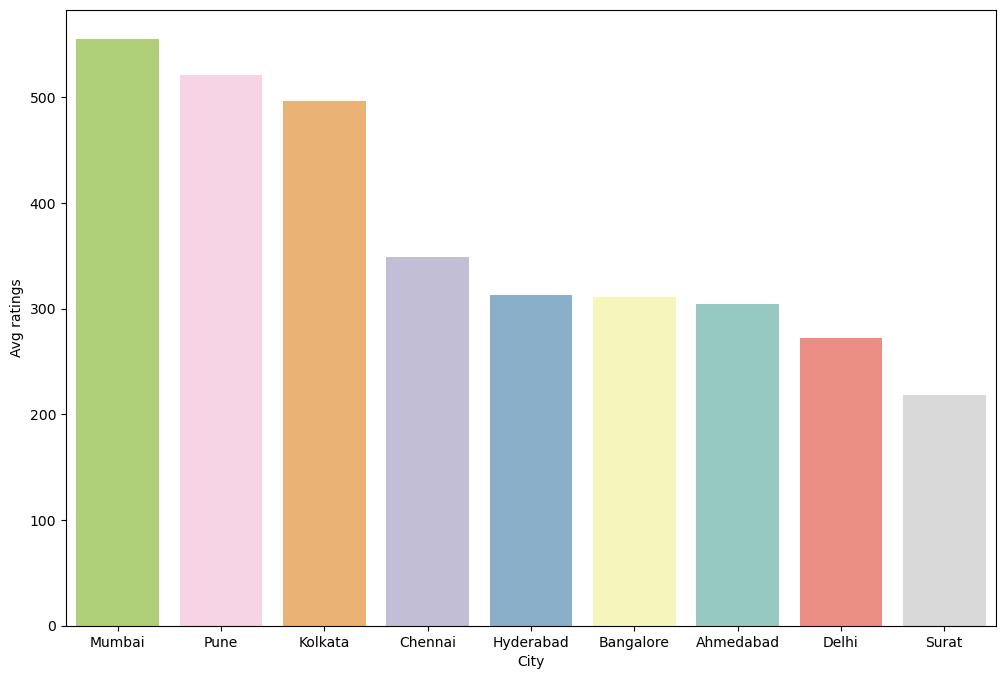

In [33]:
#Low-rated Cities (below 3.0) by Area

low_city_df = df[df['Avg ratings'] <= 3.0]
low_rated_cities = low_city_df.groupby('City',observed=False)['Avg ratings'].count().sort_values(ascending=False)
low_rated_cities = low_rated_cities.reset_index()
plt.figure(figsize=(12,8))
sns.barplot(x='City',y='Avg ratings',data=low_rated_cities,palette='Set3', hue='City',legend=False,order=low_rated_cities['City'])
plt.show()

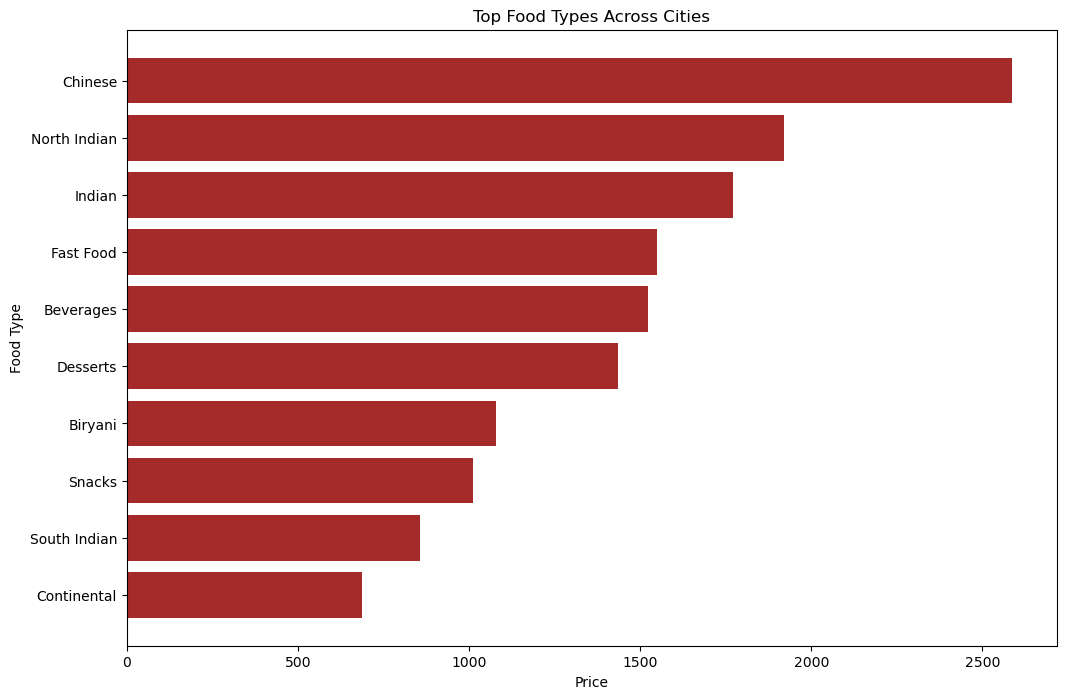

In [35]:
#Understanding Customer Preferences: Top Food Types Across Cities

popular_food_type = pd.merge(newdf,df[['City','ID']],on='ID',how='inner')
popular_food_type_df = popular_food_type.groupby('Food type')['City'].count().sort_values(ascending=False)
popular_food_type_df = popular_food_type_df.head(10)
popular_food_type_df

plt.figure(figsize=(12,8))
plt.barh(popular_food_type_df.index[::-1],popular_food_type_df.values[::-1],color='brown')
plt.title("Top Food Types Across Cities")
plt.xlabel('Price')
plt.ylabel('Food Type')
plt.show()

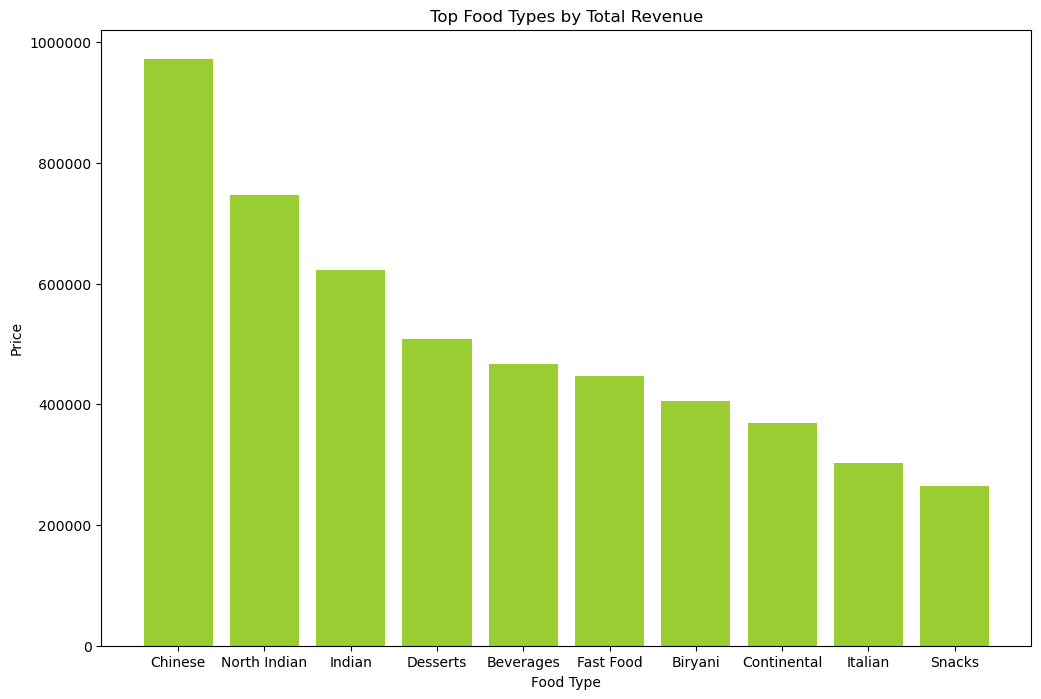

In [37]:
#Food Types That Generate the Highest Total Price
high_totalprice_foodtype = pd.merge(newdf,df[['Price','ID']],on='ID',how='inner')
high_totalprice_foodtype = high_totalprice_foodtype.groupby('Food type')['Price'].sum().sort_values(ascending=False)

high_totalprice_foodtype = high_totalprice_foodtype.astype(int).head(10)
high_totalprice_foodtype
plt.figure(figsize=(12,8))
plt.bar(high_totalprice_foodtype.index,high_totalprice_foodtype.values,color='yellowgreen')
plt.title("Top Food Types by Total Revenue")
plt.xlabel('Food Type')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Inference:
- The food types with the highest total revenue contribution are:
Chinese, North Indian, Indian, Desserts, Beverages, Fast Food, Biryani, Continental, Italian, and Snacks.
- Chinese contributes the highest total revenue at ₹9,72,269,
followed by North Indian (₹7,47,677) and Indian (₹6,22,910), making them the top 3 revenue-generating food types.

In [54]:
#Calculating Revenue contributed by Restuarant

total_revenue = df['Price'].sum()
print("Total Revenue: ₹",int(total_revenue))

revenue_by_res= df.groupby('Restaurant')['Price'].sum().reset_index().sort_values(by="Price",ascending = False)
revenue_by_res


Total Revenue: ₹ 3024498


,Restaurant,Price
4964,Oven Story Pizza,5400.0
4102,Mainland China,5150.0
696,Barbeque Nation,4800.0
728,Behrouz Biryani,4500.0
3793,La Pino'Z Pizza,4420.0
...,...,...
4581,Murugappa Mess,1.0
1687,Comfy Restaurant,0.0
4493,Mozza,0.0
4191,Maruti Dhosa Hub,0.0


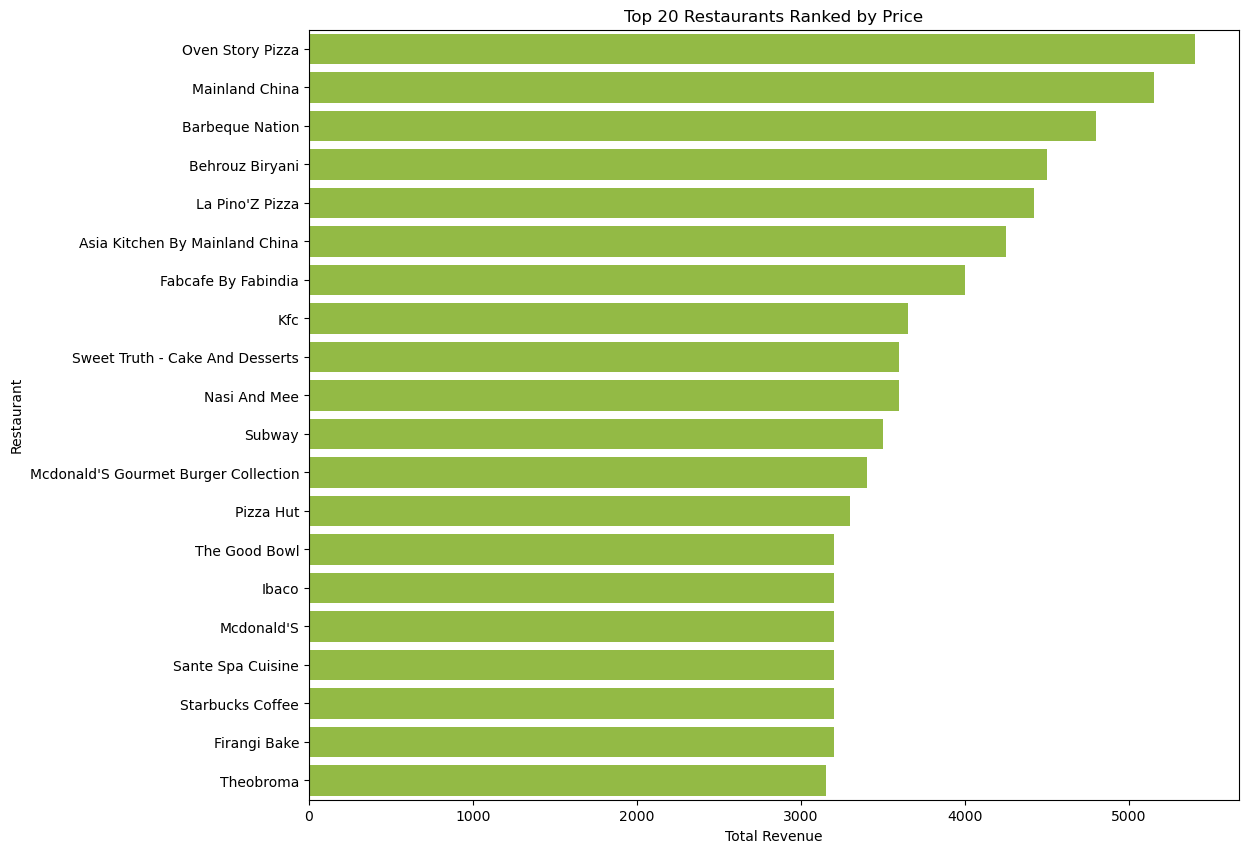

In [90]:
#Top 20 Restaurants Ranked by Price
top_20_res = revenue_by_res.head(20)
top_20_res
plt.figure(figsize=(12,10))
sns.barplot(y="Restaurant",x="Price", data=top_20_res,color="yellowgreen")
plt.title("Top 20 Restaurants Ranked by Price")
plt.xlabel("Total Revenue")
plt.ylabel("Restaurant")
plt.show()

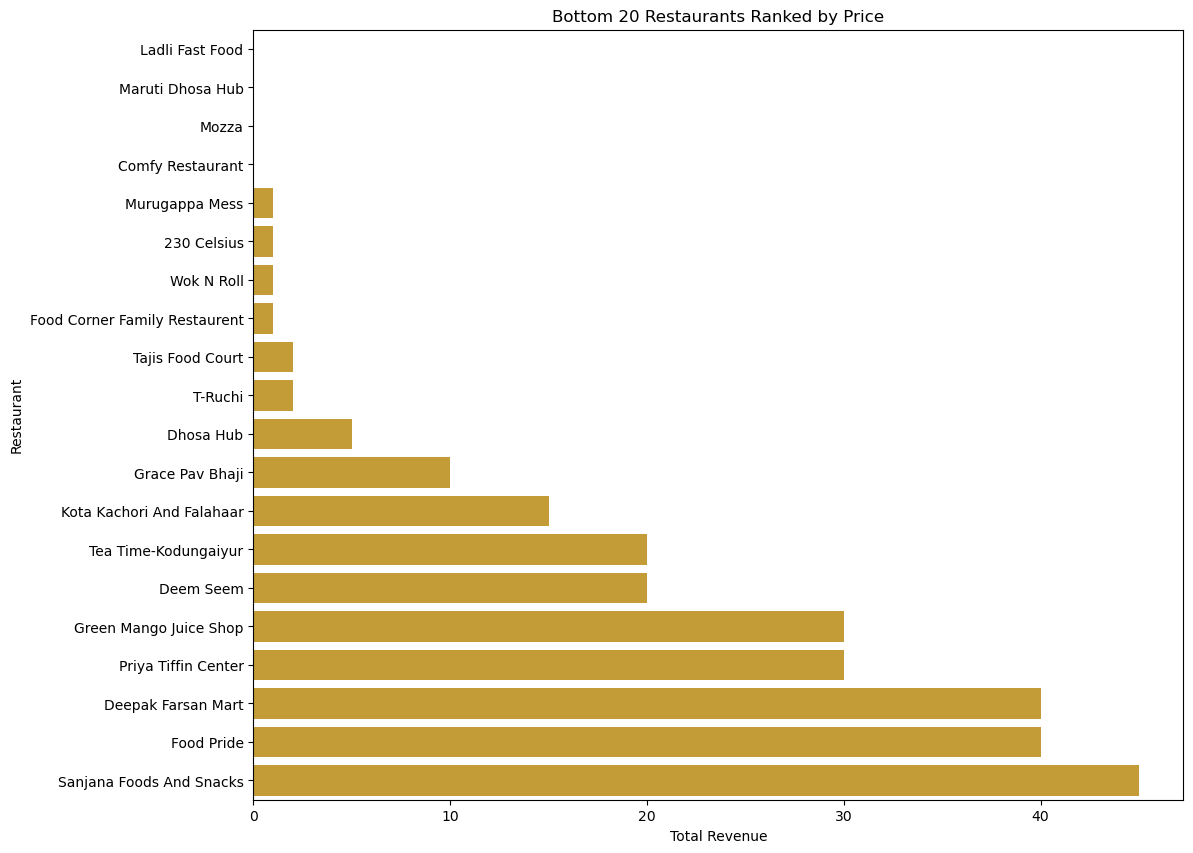

In [92]:
#Bottom 20 Restaurants Ranked by Price
bottom_20_res = revenue_by_res.tail(20)
bottom_20_res
plt.figure(figsize=(12,10))
sns.barplot(y="Restaurant",x="Price", data=bottom_20_res[::-1],color="goldenrod")
plt.title("Bottom 20 Restaurants Ranked by Price")
plt.xlabel("Total Revenue")
plt.ylabel("Restaurant")
plt.show()

In [152]:
# Average Delivery Duration Across Cities
Avg_delivery_time = int(df['Delivery time'].mean())
print("Overall Average Delivery Duration:",Avg_delivery_time,"Minutes")
city_delivery_time = df.groupby('City',observed=True)['Delivery time'].mean().astype(int).sort_values(ascending=False)
city_delivery_time = city_delivery_time.to_frame(name="Minutes")
city_delivery_time

Overall Average Delivery Duration: 53 Minutes


,Minutes
City,
Kolkata,67
Chennai,58
Pune,55
Delhi,50
Bangalore,50
Hyderabad,49
Mumbai,48
Surat,48
Ahmedabad,44


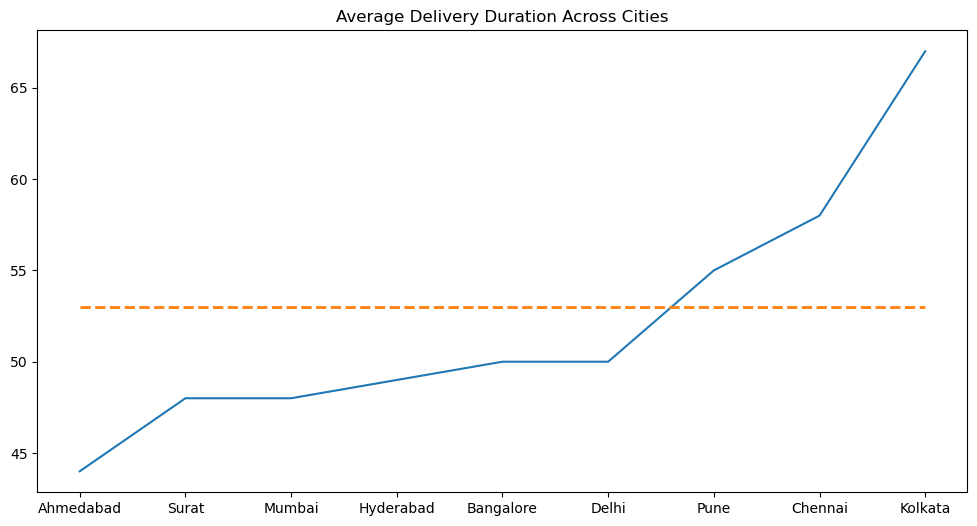

In [272]:
plt.figure(figsize=(12,6))
x=city_delivery_time.index[::-1]
y=city_delivery_time.values[::-1]
Avg=Avg_delivery_time
plt.plot(x,y)
plt.plot(x, [Avg]*len(x), linestyle='--', linewidth=2)
plt.title("Average Delivery Duration Across Cities")
plt.show()

Inference:
`
- Ahmedabad has the fastest average delivery duration,around 44 minutes.
- Kolkata has the slowest average delivery duration,around 67 minutes.
- The horizontal dashed line represents the overall average duration across all cities, which is approximately 53 minutes.
- Ahmedabad, Surat, Mumbai, Hyderabad, Bangalore, and Delhi have an average delivery duration below this overall average.
- Pune, Chennai, and Kolkata have an average delivery duration above the overall average.

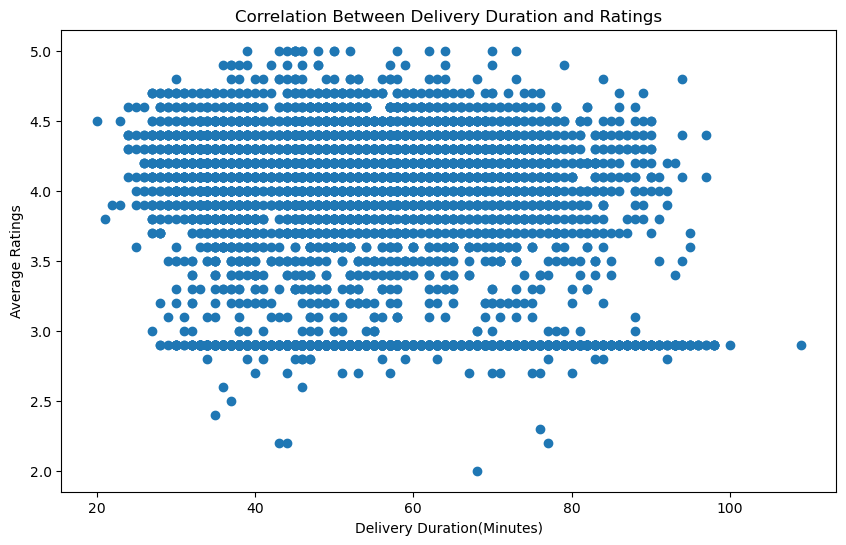

In [196]:
#Correlation Between Delivery Duration and Ratings
x=df['Delivery time']
y=df['Avg ratings']
plt.figure(figsize=(10,6))
plt.scatter(x,y)
plt.xlabel('Delivery Duration(Minutes)')
plt.ylabel('Average Ratings')
plt.title('Correlation Between Delivery Duration and Ratings')
plt.show()


Inference:

- There is no strong correlation between delivery duration and average ratings.
_ Ratings remain mostly between 4.0 and 4.5, even when delivery time ranges from 20 to 100 minutes.
- A few low-rated points (2.5–3.0) appear at both short and long delivery times, showing that bad ratings are not specifically tied to slow delivery.
- Overall, customers seem to rate restaurants based on factors other than delivery speed (such as food quality, packaging, taste, etc.).

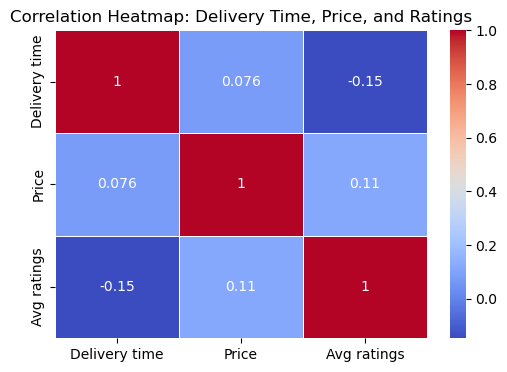

In [202]:
#Factors affecting Customer Ratings

corr_df = df[['Delivery time', 'Price', 'Avg ratings']]
corr_matrix = corr_df.corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap: Delivery Time, Price, and Ratings")
plt.show()

Inference:

- Delivery Time vs Ratings - 0.15 (Weak Negative Correlation)
- Price vs Ratings - 0.11 (Weak Positive Correlation)
- Delivery Time vs Price - 0.076 (Almost No Correlation)
- Delivery duration and price play only a minor role in rating patterns. Customers seem to rate restaurants on other basis like quality, packaging,order accuracy,etc.